# Treatment, Analysis and Visualization

In [ ]:
import pandas as pd
import numpy as np
import db_crednetials as dbc
import sys
import sqlalchemy
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
def create_db_connection(database_username, database_password, database_ip, database_name):
    """ Creates connection to MySQL database
    input : database_username, database_password, database_ip, database_name
    output : connection engine which can be used to store dataframe as table
    """
    print("Connecting to {0} database".format(database_name))
    database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))
    if database_connection:
        print("Connection Successful")
        return database_connection
    else:
        print("Connection Failed! Check Database Credentials")
        
def clip_outliers(df, col, min_percentile=3, max_percentile=97):
    return np.clip(df[col],np.percentile(df[col],min_percentile),np.percentile(df[col],max_percentile))

In [ ]:
db_connection = create_db_connection(dbc.username, dbc.password, dbc.ip, dbc.dbname)
db_df = pd.read_sql('SELECT * FROM machines', con=db_connection)
db_df = db_df.drop(columns=['index'])
db_df['timestamp'] = pd.to_datetime(db_df['timestamp'])

Connecting to company database
Connection Successful


In [ ]:
db_df.describe(datetime_is_numeric=True, percentiles=[0.01,0.02,0.03,0.04,0.25,0.50,0.75,0.95,0.96,0.97,0.98,0.99])

,timestamp,0,1,2,3
count,60000,60000.000000,60000.000000,60000.000000,60000.000000
mean,2020-05-15 00:00:00.000000256,0.002310,-0.185737,0.160426,0.294656
min,2019-01-01 00:00:00,-326.441784,-285.538100,-299.880322,-365.362164
1%,2019-01-11 00:00:00,-250.011631,-250.011856,-250.011372,-250.011990
2%,2019-01-21 00:00:00,-250.002860,-250.003197,-250.002686,-250.002421
3%,2019-01-31 00:00:00,-42.334736,-14.875929,-34.267703,-39.909596
4%,2019-02-10 00:00:00,-35.655517,-8.226894,-28.872044,-24.095863
25%,2019-09-08 00:00:00,-0.010102,-0.010187,-0.010039,-0.010113
50%,2020-05-15 00:00:00,0.000065,-0.000154,0.000016,-0.000048
75%,2021-01-20 00:00:00,0.010212,0.010003,0.010073,0.010129


* Data duration 2019-01-01 00:00:00 to 2021-09-27 00:00:00
* Machine sensor reading is getiing recored approximately every 8 hours
* We can cap all the variables at 99th percentile which will handle outlier (600 rows have outliers values)

In [ ]:
# Outlier Treatment
db_df_treated = db_df.copy()
for c in ['0','1','2','3']:
    db_df_treated[c] = clip_outliers(db_df_treated,c)

### Visualization - Original Data

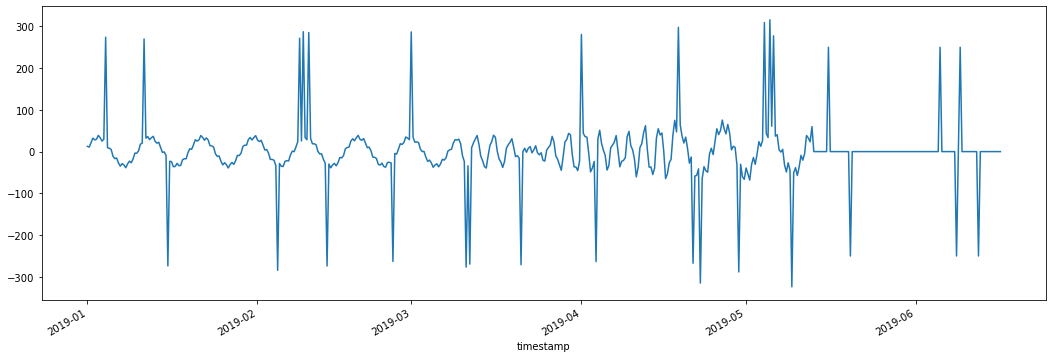

In [ ]:
plt.figure(figsize=(18,6))
db_df['0'][:500].plot()
plt.show()

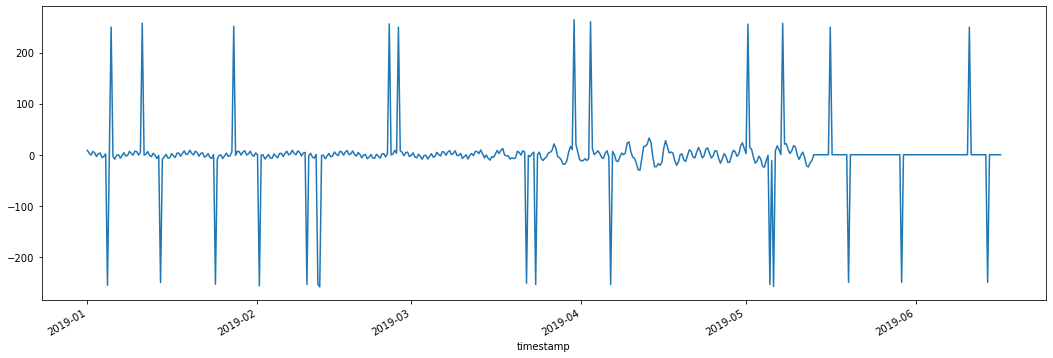

In [ ]:
plt.figure(figsize=(18,6))
db_df['1'][:500].plot()
plt.show()

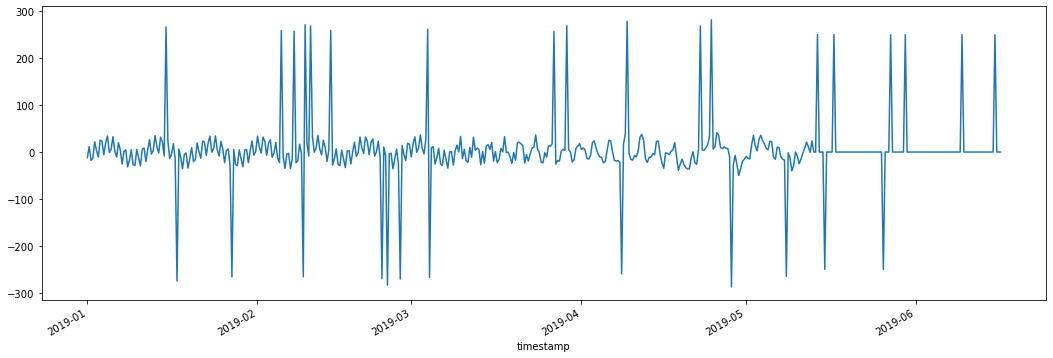

In [ ]:
plt.figure(figsize=(18,6))
db_df['2'][:500].plot()
plt.show()

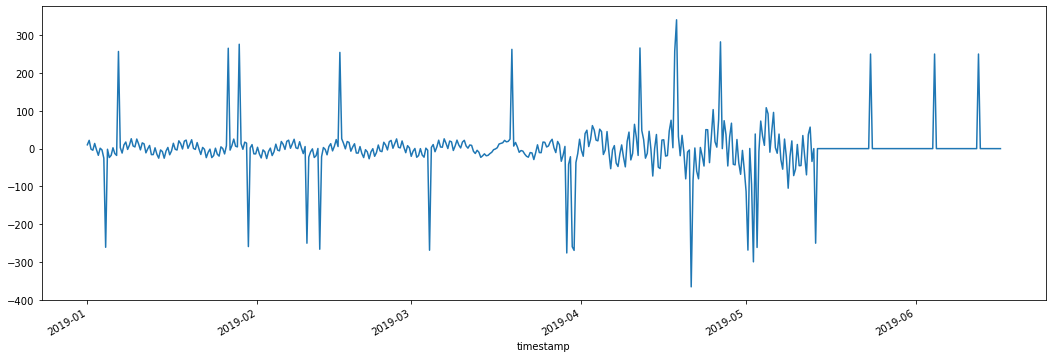

In [ ]:
plt.figure(figsize=(18,6))
db_df['3'][:500].plot()
plt.show()

### Visualization - Treated Data

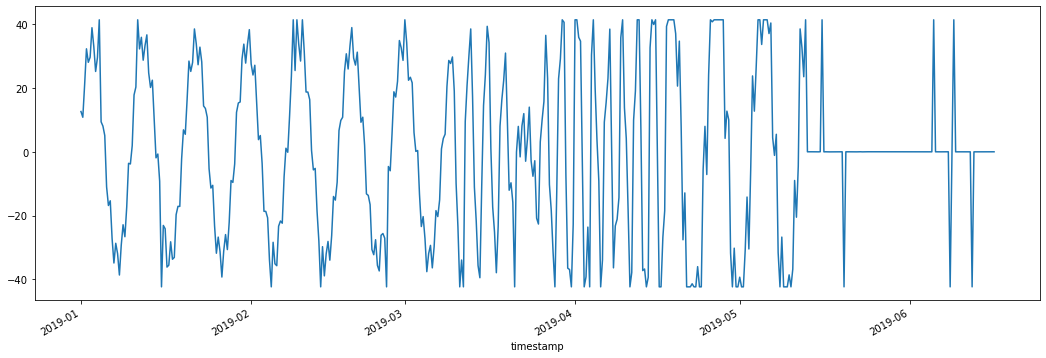

In [ ]:
plt.figure(figsize=(18,6))
db_df_treated['0'][:500].plot()
plt.show()

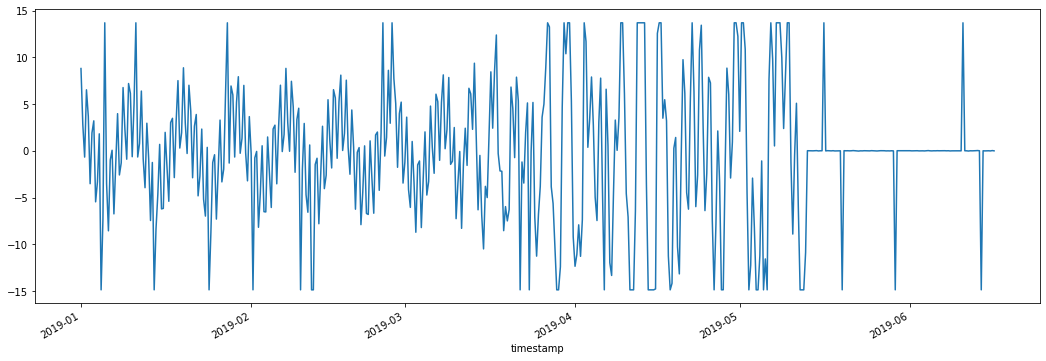

In [ ]:
plt.figure(figsize=(18,6))
db_df_treated['1'][:500].plot()
plt.show()

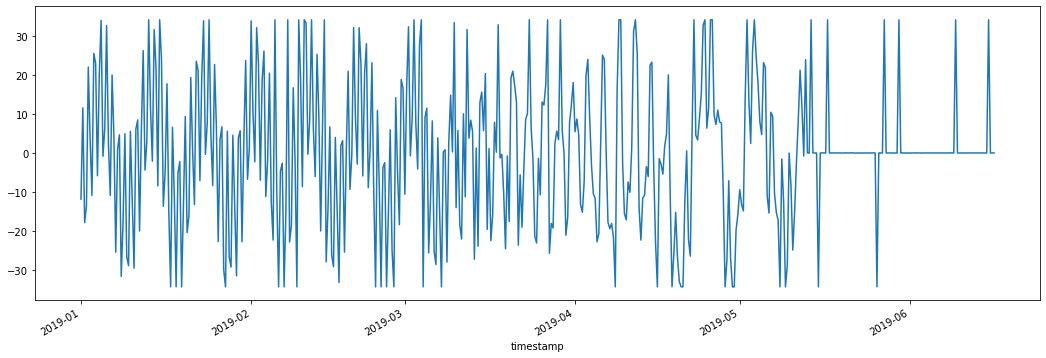

In [ ]:
plt.figure(figsize=(18,6))
db_df_treated['2'][:500].plot()
plt.show()

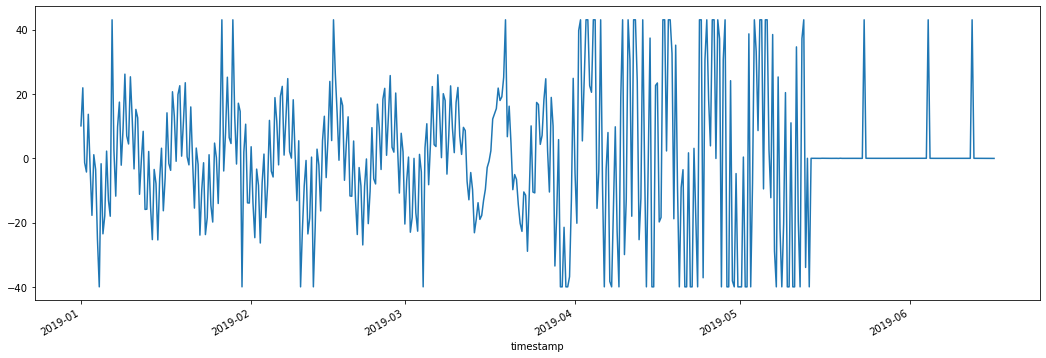

In [ ]:
plt.figure(figsize=(18,6))
db_df_treated['3'][:500].plot()
plt.show()